<a href="https://colab.research.google.com/github/Darshini-A/Data-Science-2/blob/main/Prac_6_DSII_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q6.Forecast pollution level of a city. Use Regression Models. Use the data setPRSA_data_2010.1.1-2014.12.31.csv

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df=pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [16]:
df = df.dropna(subset=['pm2.5'])

In [17]:
pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41757 entries, 24 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  int64  
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 4.5 MB


""


In [4]:
pd.DataFrame(df.describe())

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


In [5]:
 df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


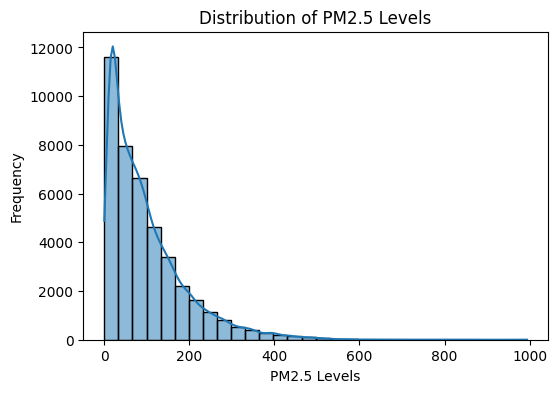

In [18]:
# Visualize the distribution of the target variable ('pm2.5')
plt.figure(figsize=(6, 4))
sns.histplot(df['pm2.5'], bins=30, kde=True)
plt.title('Distribution of PM2.5 Levels')
plt.xlabel('PM2.5 Levels')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Feature Engineering

# Handling Categorical Feature 'cbwd'
le_cbwd = LabelEncoder()
df['cbwd'] = le_cbwd.fit_transform(df['cbwd'])

In [20]:
# Feature Selection

# Using SelectKBest to select the top k features based on F-statistic
X = df[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]
y = df['pm2.5']

In [21]:
selector = SelectKBest(f_regression, k='all')
X_selected = selector.fit_transform(X, y)

In [22]:
# Display the selected features
selected_features = [feature for feature, selected in zip(X.columns, selector.get_support()) if selected]
print("Selected Features:", selected_features)

Selected Features: ['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [24]:
# Regression Model (Linear Regression in this example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 6457.62
R-squared (R2): 0.27
